# Data cleaning with klib

## Imports

In [2]:
import klib
print(klib.__version__)
import pandas as pd
from zipfile import ZipFile
# %load_ext memory_profiler

0.2.3


## Datasets

#### Downloads

In [5]:
# Go to https://www.kaggle.com/**your_username**/account
# Create an API token and save it under ~/.kaggle/kaggle.json

# !kaggle datasets download -d mlg-ulb/creditcardfraud
# !kaggle datasets download -d sogun3/uspollution
# !kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe

#### Unzip

In [3]:
filenames = ["creditcardfraud", "uspollution", "515k-hotel-reviews-data-in-europe"]
for filename in filenames:
    with ZipFile(filename + ".zip", 'r') as zipObj:
        zipObj.extractall('datasets')    

FileNotFoundError: [Errno 2] No such file or directory: 'creditcardfraud.zip'

## Data Cleaning

In [4]:
df_fraud = pd.read_csv("./datasets/creditcard.csv")
df_pollution = pd.read_csv("./datasets/pollution_us_2000_2016.csv")
df_hotel = pd.read_csv("./datasets/Hotel_Reviews.csv")

In [5]:
# Cleaning all these dataframes might take a moment
df_fraud_cleaned = klib.data_cleaning(df_fraud, show=None)
print("1/3")
df_pollution_cleaned = klib.data_cleaning(df_pollution, show=None)
print("2/3")
df_hotel_cleaned = klib.data_cleaning(df_hotel, show=None)
print("3/3")

1/3
2/3
Long column names detected (>25 characters). Consider renaming thefollowing columns ['additional_number_of_scoring', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given'].
3/3


## Comparisson

In [6]:
def byte_to_mb(df):
    return round(df.memory_usage(deep=True).sum()/1024**2,2)

In [7]:
df_dict = {"Fraud" : df_fraud, "Pollution" : df_pollution, "Hotel" : df_hotel}
for name, df in df_dict.items():
    print(f"{name}".ljust(15), f"Shape: {df.shape}".ljust(25), f"Memory: {byte_to_mb(df)}")

Fraud           Shape: (284807, 31)       Memory: 67.36
Pollution       Shape: (1746661, 29)      Memory: 1341.26
Hotel           Shape: (515738, 17)       Memory: 459.37


In [8]:
df_cleaned_dict = {"Fraud" : df_fraud_cleaned, "Pollution" : df_pollution_cleaned, "Hotel" : df_hotel_cleaned}
for name, df in df_cleaned_dict.items():
    print(f"{name}".ljust(15), f"Shape: {df.shape}".ljust(25), f"Memory: {byte_to_mb(df)}")

Fraud           Shape: (283726, 31)       Memory: 34.91
Pollution       Shape: (1746661, 25)      Memory: 203.86
Hotel           Shape: (515212, 17)       Memory: 249.06


In [9]:
def compare_dtypes(df, df2):
    df_dtypes = df.dtypes.rename("dtypes").to_frame().reset_index()
    df_dtypes_cleaned = df2.dtypes.rename("dtypes_cleaned").to_frame().reset_index()
    df_dtypes["index"] = klib.clean_column_names(df).columns
    df_dtypes = df_dtypes.merge(df_dtypes_cleaned, on="index", how="outer").set_index("index").fillna("- dropped -")
    return df_dtypes

In [10]:
df_hotel.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [11]:
dtypes_fraud = compare_dtypes(df_fraud, df_fraud_cleaned)
dtypes_pollution = compare_dtypes(df_pollution, df_pollution_cleaned)
dtypes_hotel = compare_dtypes(df_hotel, df_hotel_cleaned)

Long column names detected (>25 characters). Consider renaming thefollowing columns ['additional_number_of_scoring', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given'].


In [12]:
dtypes_pollution

,dtypes,dtypes_cleaned
index,,
unnamed_0,int64,int32
state_code,int64,int8
county_code,int64,int16
site_num,int64,int16
address,object,category
state,object,category
county,object,category
city,object,category
date_local,object,category


In [16]:
print("value_counts():")
%timeit df_fraud.value_counts()
%timeit df_fraud_cleaned.value_counts()
print("max():")
%timeit df_fraud.max()
%timeit df_fraud_cleaned.max()
print("\nsort_values():")
%timeit df_fraud.sort_values("v1")
%timeit df_fraud_cleaned.sort_values("v1")
print("\nnlargest():")
%timeit df_fraud.nlargest(5, "v1")
%timeit df_fraud_cleaned.nlargest(5, "v1")

value_counts():
2.32 s ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.34 s ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
max():
44.7 ms ± 978 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
29.1 ms ± 746 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

sort_values():
89.1 ms ± 2.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
69 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

nlargest():
28.2 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.8 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
print("value_counts():")
%timeit df_pollution.value_counts()
%timeit df_pollution_cleaned.value_counts()
print("max():")
%timeit df_pollution.max()
%timeit df_pollution_cleaned.max()
print("\nsort_values():")
%timeit df_pollution.sort_values("state_code")
%timeit df_pollution_cleaned.sort_values("state_code")
print("\nlargest():")
%timeit df_pollution.nlargest(5, "state_code")
%timeit df_pollution_cleaned.nlargest(5, "state_code")

value_counts():
3.4 s ± 36.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.46 s ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
max():
973 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
75.4 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

sort_values():
365 ms ± 4.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
191 ms ± 5.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

largest():
191 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
67 ms ± 3.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
print("value_counts():")
%timeit df_hotel.value_counts()
%timeit df_hotel_cleaned.value_counts()
print("max():")
%timeit df_hotel.max()
%timeit df_hotel_cleaned.max()
print("\nsort_values():")
%timeit df_hotel.sort_values("review_date")
%timeit df_hotel_cleaned.sort_values("review_date")
print("\nnlargest():")
%timeit df_hotel.nlargest(5, "lng")
%timeit df_hotel_cleaned.nlargest(5, "lng")

value_counts():
2.69 s ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.03 s ± 99.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
max():
281 ms ± 6.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
149 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

sort_values():
559 ms ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
301 ms ± 9.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

nlargest():
53.1 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
75 ms ± 4.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---

## Memory

In [26]:
%memit df_fraud.value_counts()
%memit df_fraud_cleaned.value_counts()
%memit df_pollution.value_counts()
%memit df_pollution_cleaned.value_counts()
%memit df_hotel.value_counts()
%memit df_hotel_cleaned.value_counts()

peak memory: 1273.22 MiB, increment: 192.46 MiB
peak memory: 1236.38 MiB, increment: 150.53 MiB
peak memory: 1643.89 MiB, increment: 558.04 MiB
peak memory: 1520.69 MiB, increment: 438.26 MiB
peak memory: 1205.98 MiB, increment: 123.98 MiB
peak memory: 1188.65 MiB, increment: 106.43 MiB


---

## Bonus - Plots

GridSpec(6, 8)

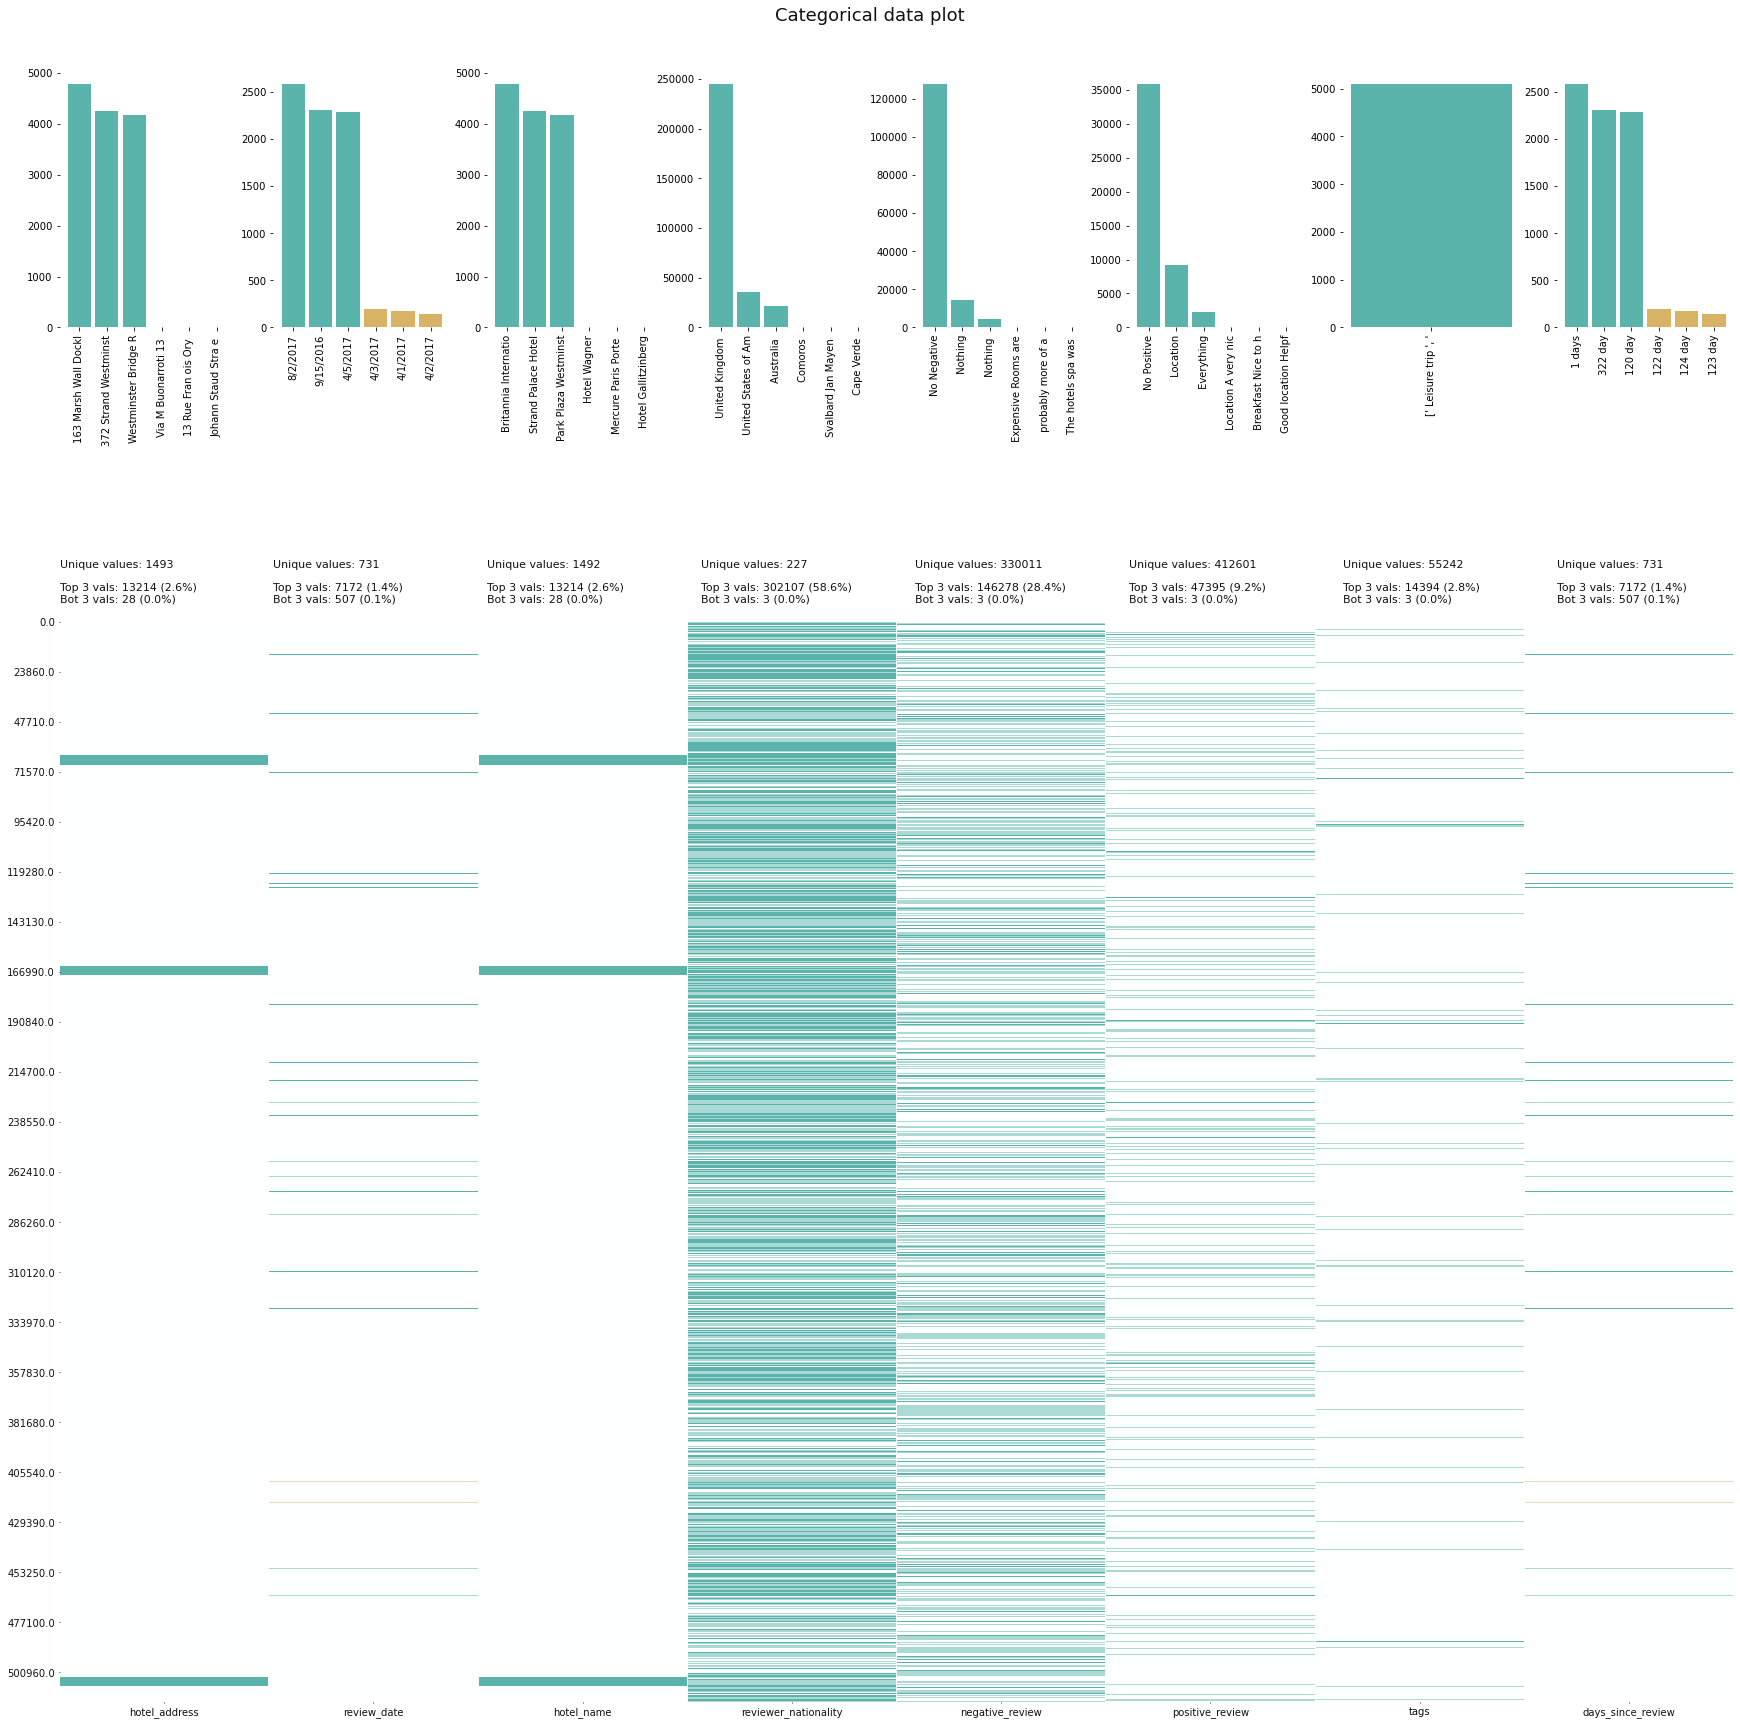

In [22]:
klib.cat_plot(df_hotel_cleaned, figsize=(30,30))

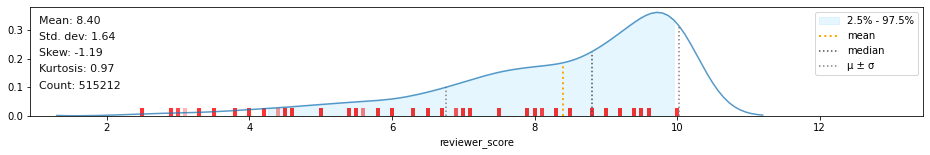

In [47]:
distplot = klib.dist_plot(df_hotel_cleaned["reviewer_score"])

In [53]:
# distplot.figure.savefig("dist_plot.png", dpi=200, bbox_inches='tight')

GridSpec(6, 6)

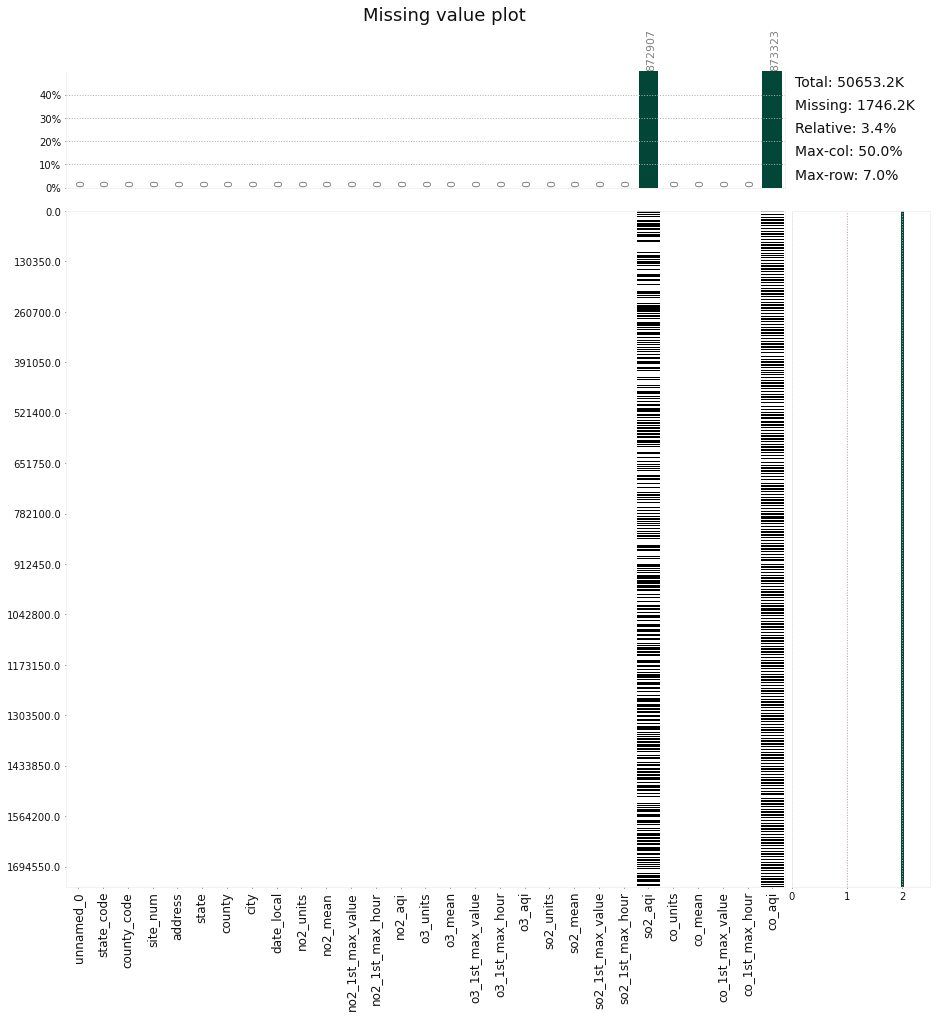

In [24]:
klib.missingval_plot(df_pollution, figsize=(15,15))